
Would you like to filter any others? no
   Frequency       Word
0         21  Microsoft
1          9       Xbox
2          9    Windows
3          9    Surface
4          8     Office
5          7        NOW
6          7        365
The top word is: Microsoft
Would you like to save this image (y/n)? n


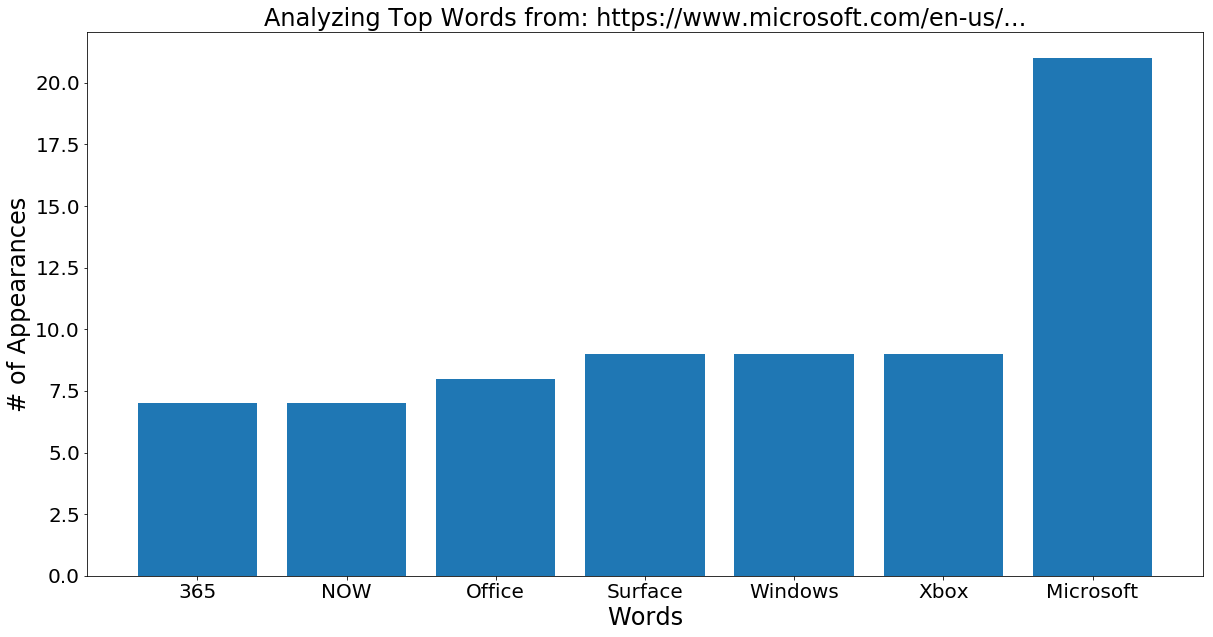

Would you like to scrape a website (y/n)? n
Thanks for analyzing! Come back again!


In [2]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
import pandas as pd
from IPython.display import clear_output

# graph results of top 7 words
def displayResults(words, site):
    count = [num for num in words['Frequency']][::-1]     # reverses order
    word = [word for word in words['Word']][::-1]      # reverses order
    
    plt.figure(figsize=(20, 10))   # define how large the figure appears

    plt.bar(word, count)

    plt.title("Analyzing Top Words from: {}...".format(site[:50]), fontname="Sans Serif", fontsize=24)
    plt.xlabel("Words", fontsize=24)
    plt.ylabel("# of Appearances", fontsize=24)
    plt.xticks(fontname="Sans Serif", fontsize=20)
    plt.yticks(fontname="Sans Serif", fontsize=20)
    
    ans = input('Would you like to save this image (y/n)? ').lower()
    
    if ans == 'y':
        print('Please provide the name and extension, ex: "image.png"...')
        
        filename = input('What would you like to call the chart? ')
        
        plt.savefig(filename)
        
        print('File saved!')
        
    plt.show()
    
# filter out all elements that do not contain text that appears on site
def filterTags(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    
    if isinstance(element, Comment):
        return False
    
    return True

# request site and top 7 most used words
def scrape(site):    
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    text = soup.find_all(text=True)     # will get all text within the document
    
    visible_text = filter(filterTags, text)
    
    word_count = {}
    
    bad_words = set(['the', 'a', 'in', 'of', 'to', 'you', '\xa0', 'and', 'at', 'on', 'for', 'from', 'is', 'that', 'are', 'be', '-', 'as', '&', 'they', 'with',
                 'how', 'was', 'her', 'him', 'i', 'has', '|', 'his'])
    
    print('\nThis is a list of words currently being filtered:')
    print(bad_words)
    
    while input('\nWould you like to filter any others? ').lower() != 'no':
        print('\nThis is a list of words currently being filtered:')
        print(bad_words)
        
        word = input('What word would you like to filter? ')

        bad_words.add(word)

        clear_output()

    for text in visible_text:
        words = text.replace('\n', '').replace('\t', '').split(' ')   # replace all hidden chars
    
        words = list(filter(lambda word: True if word.lower() not in bad_words else False, words))
        
        for word in words:
            if word != '':
                if word in word_count:
                    word_count[word] += 1
                else:
                    word_count[word] = 1
                    
    words = [word for word in word_count.keys()]
    frequency = [word for word in word_count.values()]
                             
    df = pd.DataFrame.from_dict({ 'Word' : words, 'Frequency' : frequency })
    
    df = df.sort_values('Frequency', ascending=False).reset_index(drop=True)
    
    return df
            
# main loop should ask if user wants to scrape, then what site to scrape
while input('Would you like to scrape a website (y/n)? ') == 'y':
    try:
        clear_output()

        site = input('Enter a website to analyze: ')

        df = scrape(site)

        print(df.head(7))

        top_word = df.loc[0]['Word']
        top_words = df[0:7]

        print("The top word is: {}".format(top_word))

        displayResults(top_words, site)
    except:
        print('Something went wrong, please try again.')
    
print('Thanks for analyzing! Come back again!')